# Day 13. Task 05
# Регрессия

## 0. Импорты

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## 1. Препроцессинг

1. Прочитайте файл из: `datasets/checker_regression.csv`.
2. Заполните пропущенные значения нулями.
3. Разбейте ваш датасет на train и test, используя параметр `test_size=0.2`.

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
df = pd.read_csv('../content/drive/MyDrive/School21/day13/data/checker_regression.csv')
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,NaN
1,user_1,62,28.0,NaN
2,user_1,62,28.0,NaN
3,user_1,62,28.0,NaN
4,user_1,62,28.0,NaN
...,...,...,...,...
72,user_31,128,NaN,-104.75
73,user_4,40,NaN,-175.60
74,user_6,15,NaN,-62.60
75,user_7,8,NaN,-115.50


In [94]:
df.fillna(0, inplace=True)
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.00
1,user_1,62,28.0,0.00
2,user_1,62,28.0,0.00
3,user_1,62,28.0,0.00
4,user_1,62,28.0,0.00
...,...,...,...,...
72,user_31,128,0.0,-104.75
73,user_4,40,0.0,-175.60
74,user_6,15,0.0,-62.60
75,user_7,8,0.0,-115.50


In [95]:
df = pd.get_dummies(df)
df

,num_commits,pageviews,AVG(diff),uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,uid_user_27,uid_user_28,uid_user_29,uid_user_3,uid_user_30,uid_user_31,uid_user_4,uid_user_6,uid_user_7,uid_user_8
0,62,28.0,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,62,28.0,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,28.0,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,62,28.0,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,62,28.0,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,128,0.0,-104.75,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
73,40,0.0,-175.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
74,15,0.0,-62.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
75,8,0.0,-115.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [96]:
scaler = StandardScaler()
df[['num_commits', 'pageviews']] = scaler.fit_transform(df[['num_commits', 'pageviews']])
df

,num_commits,pageviews,AVG(diff),uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,uid_user_27,uid_user_28,uid_user_29,uid_user_3,uid_user_30,uid_user_31,uid_user_4,uid_user_6,uid_user_7,uid_user_8
0,0.406864,-0.476157,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.406864,-0.476157,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.406864,-0.476157,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.406864,-0.476157,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.406864,-0.476157,0.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2.585669,-0.775718,-104.75,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
73,-0.319404,-0.775718,-175.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
74,-1.144708,-0.775718,-62.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
75,-1.375794,-0.775718,-115.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [97]:
X = df.drop(columns='AVG(diff)')
y = df['AVG(diff)']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=21,
                                                    shuffle=True,
                                                    stratify=None)

## 2. Кросс-валидация

1. Напишите функцию `crossval`, которая на вход примет: `n_splits` для `KFold()`, `X`, `y`, созданный класс модели с ее параметрами (не забывайте про `random_state=21`). И вернет в качестве результата что-то такое:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Средний RMSE на кросс-валидации – 3164.0686140637476
```

2. Запустите эту функцию для `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Вы можете использовать любые гиперпараметры для этих моделей, но постарайтесь найти наилучшие для себя.

In [99]:
def crossval(n_splits, X, y, model):
    X = np.array(X)
    y = np.array(y)
    kf = KFold(n_splits=n_splits,
               shuffle=True,
               random_state=21)
    result = 0
    for train_index, test_index in kf.split(X):
        X_train,X_test = X[train_index], X[test_index]
        y_train,y_test = y[train_index], y[test_index]
        fit = model.fit(X_train,y_train)
        train_predict = fit.predict(X_train)
        test_predict = fit.predict(X_test)
        rmse_train = mean_squared_error(y_train, train_predict, squared=False)
        rmse_test = mean_squared_error(y_test, test_predict, squared=False)
        print('train - {} | test - {}'.format(rmse_train, rmse_test))
        result += rmse_test
    result /= n_splits
    print('Средний RMSE на кросс-валидации- {}'.format(result))
    return result
    

In [100]:
lr_csv = crossval(10, X_train, y_train, LinearRegression())

train - 8.74501251826057e-14 | test - 28.965002717047724
train - 4.556135722133033e-14 | test - 43.521061556002806
train - 2.6097228921681483e-13 | test - 28.398412899629694
train - 3.319999225227991e-14 | test - 63.35602140569197
train - 8.440082956759983e-14 | test - 25.394116432423083
train - 4.026442478955306e-14 | test - 8.841398747629459
train - 4.999699398651577e-14 | test - 40.780889080939126
train - 7.640409047662983e-14 | test - 16.624222390086832
train - 3.3841812336219005e-14 | test - 27.77919521906497
train - 6.682083835285722e-14 | test - 23.08088271228177
Средний RMSE на кросс-валидации- 30.67412031607974


In [101]:

tree_csv = crossval(10, X_train, y_train, DecisionTreeRegressor(random_state=21))

train - 0.0 | test - 41.651684925616834
train - 0.0 | test - 49.425259698825016
train - 0.0 | test - 56.90981169066251
train - 0.0 | test - 60.36467571414655
train - 0.0 | test - 19.187669651801563
train - 0.0 | test - 23.43345187262574
train - 0.0 | test - 58.142971932858615
train - 0.0 | test - 68.36564005946803
train - 0.0 | test - 54.39678341865717
train - 0.0 | test - 44.97535333276891
Средний RMSE на кросс-валидации- 47.685330229743094


In [102]:

forest_csv = crossval(10, X_train, y_train, RandomForestRegressor(random_state=21))

train - 13.436176003890042 | test - 18.901121378087797
train - 12.905204026541632 | test - 28.379788159885926
train - 12.255745067460639 | test - 43.003037800156214
train - 11.0340619080375 | test - 58.06881306228812
train - 12.448612850941508 | test - 30.526017464236165
train - 14.076597681609673 | test - 6.174074979448449
train - 13.054888824408907 | test - 29.167927602346754
train - 12.24783608644829 | test - 54.39843410336499
train - 13.139498320758372 | test - 33.05316171238667
train - 13.287917098255127 | test - 23.261715425103944
Средний RMSE на кросс-валидации- 32.4934091687305


Подбор параметров

In [103]:
regressor = LinearRegression()

In [104]:
grid = {
    'fit_intercept': [True, False]
    #,'normalize': [True, False]
    ,'positive': [True, False]
}      

In [105]:
best_score = 10000
for g in ParameterGrid(grid):
    regressor.set_params(**g)
    score = crossval(10, X_train, y_train, regressor)
    if score < best_score:
        best_score = score
        best_grid = g

train - 7.846050838680277e-14 | test - 17.994092845289288
train - 9.412961960490204e-14 | test - 3.983900220861888
train - 6.274532087055797e-14 | test - 90.17560133782848
train - 7.883148090450153e-14 | test - 34.61378490564126
train - 4.649479259891974e-14 | test - 80.84318866283874
train - 7.767012829288921e-14 | test - 57.097820771797196
train - 7.334214612073665e-14 | test - 62.92278241328597
train - 5.758856622782756e-14 | test - 83.52713058449989
train - 6.27160545810131e-14 | test - 56.572365118795545
train - 8.754860943018738e-14 | test - 43.440841118174504
Средний RMSE на кросс-валидации- 53.117150797901274
train - 8.74501251826057e-14 | test - 28.965002717047724
train - 4.556135722133033e-14 | test - 43.521061556002806
train - 2.6097228921681483e-13 | test - 28.398412899629694
train - 3.319999225227991e-14 | test - 63.35602140569197
train - 8.440082956759983e-14 | test - 25.394116432423083
train - 4.026442478955306e-14 | test - 8.841398747629459
train - 4.999699398651577e-14

In [106]:
best_score

30.67412031607974

In [107]:
best_grid

{'fit_intercept': True, 'positive': False}

In [108]:
regressor = DecisionTreeRegressor(random_state=21)

In [109]:
grid = {'max_depth': [5, 6, 7, 8, 9, 10, 20, 25, 30, 50],
        'max_features': ['sqrt', 'log2']}

In [110]:
best_score = 10000
for g in ParameterGrid(grid):
    regressor.set_params(**g)
    score = crossval(10, X_train, y_train, regressor)
    if score < best_score:
        best_score = score
        best_grid = g

train - 38.049220668226795 | test - 48.16537018743332
train - 28.47584475028659 | test - 62.14247561585125
train - 34.832235274848856 | test - 12.60971481305849
train - 26.522062645459858 | test - 87.78452214940853
train - 34.84827558448367 | test - 12.129405510454214
train - 31.928848677626757 | test - 31.48357986316042
train - 23.843429944434412 | test - 36.64443613974706
train - 35.818169106506446 | test - 20.18994781171689
train - 32.32869375647584 | test - 41.28095502143187
train - 31.928848677626757 | test - 43.89482089039662
Средний RMSE на кросс-валидации- 39.63252280026586
train - 21.701435066617538 | test - 21.424286211739688
train - 34.07702577051408 | test - 61.0722076752137
train - 39.28926582119519 | test - 14.711475023235696
train - 16.569383332373942 | test - 53.171197682775905
train - 39.245197457725034 | test - 16.016800951763692
train - 39.14243020590626 | test - 30.67550657615459
train - 32.123622469568645 | test - 63.645444046766336
train - 39.501971316919175 | tes

In [111]:
best_score

31.065551987526295

In [112]:
best_grid_tree

{'fit_intercept': True, 'positive': False}

In [113]:
regressor = RandomForestRegressor(random_state=21)

In [114]:
grid = {'n_estimators': [150, 200, 250],
        'max_depth': [10, 20, 30],
        'max_features': ['sqrt', 'log2']}

In [115]:
best_score = 10000
for g in ParameterGrid(grid):
    regressor.set_params(**g)
    score = crossval(10, X_train, y_train, regressor)
    if score < best_score:
        best_score = score
        best_grid_forest = g

train - 13.44511123003387 | test - 27.094994522735192
train - 13.704116272384134 | test - 40.059158192617126
train - 14.072720224565712 | test - 31.512497609627882
train - 10.869169345294383 | test - 61.99747165681394
train - 13.692993434314499 | test - 22.919220907302776
train - 14.927408603584034 | test - 10.033929176763584
train - 14.59339511496218 | test - 41.25056486289243
train - 13.44715614348125 | test - 24.276327140030055
train - 14.121458521287801 | test - 21.867870984170334
train - 14.364622012677623 | test - 28.876814090114397
Средний RMSE на кросс-валидации- 30.988884914306777
train - 13.403909603555922 | test - 25.862751688147434
train - 13.588959663439155 | test - 40.70774596288489
train - 14.131163267853193 | test - 31.19148776106478
train - 10.93966796100015 | test - 62.40311935848527
train - 13.587743568985397 | test - 23.57371728028511
train - 14.739768793327139 | test - 9.33087087818887
train - 14.222900763569834 | test - 40.17106036892121
train - 13.268378398250347

In [116]:
best_score

30.172516076048424

In [117]:
best_grid_forest

{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 200}

## 3. Прогнозы и оценка качества

1. Сделайте прогноз для тестового датасета, используя каждую из тех трех моделей с финализированными гиперпараметрами.
2. Нарисуйте график для каждой модели, где по оси икс – реальная средняя разница, а по оси игрек – то, что было спрогнозировано моделью.
3. Как выглядел бы график для идеального случая? Запишите ответ в markdown-ячейку в конце этой секции.

In [118]:
best_tree = DecisionTreeRegressor(max_depth=10,
                                  max_features='log2',
                                  random_state=21).fit(X_train, y_train)

In [119]:
final = pd.DataFrame({'y_test': y_test, 'y_pred': best_tree.predict(X_test)})
final

,y_test,y_pred
3,0.0,0.000000
19,-17.5,-69.538095
14,-48.5,-69.538095
45,-223.6,-69.538095
10,0.0,0.000000
54,0.0,0.000000
23,0.0,0.000000
29,0.0,0.000000
24,0.0,0.000000
13,-89.0,-69.538095


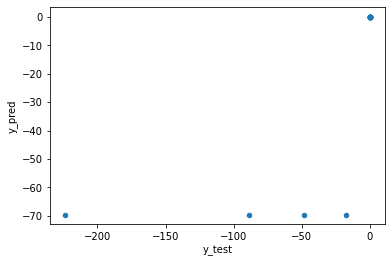

In [120]:
final.plot.scatter('y_test', 'y_pred')
pass

In [121]:
best_forest= RandomForestRegressor(max_depth=20,
                                  max_features='log2',
                                  n_estimators=200,
                                  random_state=21).fit(X_train, y_train)

In [122]:
final = pd.DataFrame({'y_test': y_test, 'y_pred': best_forest.predict(X_test)})
final

,y_test,y_pred
3,0.0,0.000000
19,-17.5,-50.311917
14,-48.5,-76.082833
45,-223.6,-67.670833
10,0.0,0.000000
54,0.0,0.000000
23,0.0,-0.196667
29,0.0,-1.607500
24,0.0,-0.196667
13,-89.0,-74.741083


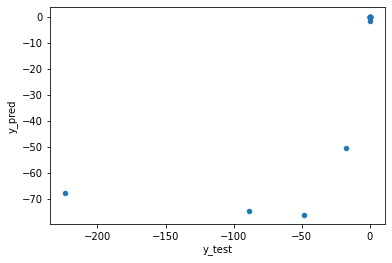

In [123]:
final.plot.scatter('y_test', 'y_pred')

In [124]:
best = LinearRegression(
    fit_intercept=True
    ,positive=False
).fit(X_train, y_train)

In [125]:
final = pd.DataFrame({'y_test': y_test, 'y_pred': best.predict(X_test)})
final

,y_test,y_pred
3,0.0,7.105427e-14
19,-17.5,-6.392683e+01
14,-48.5,-6.280030e+01
45,-223.6,-6.338299e+01
10,0.0,-2.131628e-14
54,0.0,-4.973799e-14
23,0.0,1.421085e-14
29,0.0,9.947598e-14
24,0.0,1.421085e-14
13,-89.0,-6.147953e+01


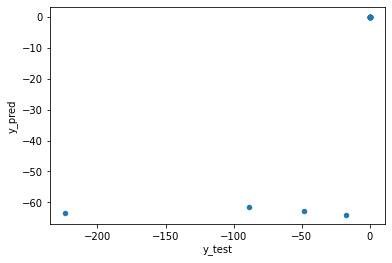

In [126]:
final.plot.scatter('y_test', 'y_pred')

 #@markdown **Как выглядел бы график для идеального случая? 
 Ответ: диагональ - график функции y=x (y_pred=y_test)**

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  77 non-null     float64
 1   pageviews    77 non-null     float64
 2   AVG(diff)    77 non-null     float64
 3   uid_user_1   77 non-null     uint8  
 4   uid_user_10  77 non-null     uint8  
 5   uid_user_11  77 non-null     uint8  
 6   uid_user_12  77 non-null     uint8  
 7   uid_user_13  77 non-null     uint8  
 8   uid_user_14  77 non-null     uint8  
 9   uid_user_15  77 non-null     uint8  
 10  uid_user_16  77 non-null     uint8  
 11  uid_user_17  77 non-null     uint8  
 12  uid_user_18  77 non-null     uint8  
 13  uid_user_19  77 non-null     uint8  
 14  uid_user_2   77 non-null     uint8  
 15  uid_user_20  77 non-null     uint8  
 16  uid_user_21  77 non-null     uint8  
 17  uid_user_22  77 non-null     uint8  
 18  uid_user_23  77 non-null     uint8  
 19  uid_user_2